In [0]:
#Import the required libraries from PyTorch(Deep Learning Framework), and pyplot for aided visualization 

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.cuda as cuda
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision import transforms
from torchvision import datasets
from torch.autograd import Variable


In [0]:
#Define some basic transformer operations to properly prepare the images
mean = 0.1307 
std = 0.3081
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((mean,), (std,))])

In [0]:
#Load the MNIST dataset from torchvision

train_set = datasets.MNIST('/data', train=True, transform=transform, download=True)
test_set = datasets.MNIST('/data', train=False, transform=transform, download=True )

0it [00:00, ?it/s]

9920512it [00:01, 8379089.10it/s]                            


Extracting /data/MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 85483.31it/s]            
0it [00:00, ?it/s]

Extracting /data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:01, 1077367.27it/s]                            
0it [00:00, ?it/s]

Extracting /data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 26367.27it/s]            

Extracting /data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
#Feed the dataset into the dataloaders

batch_size=1200
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True)

In [0]:
#classes for which we want to classify our images into
classes = ('one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine',)

In [0]:
#function to show an image in order to get a better understanding of the data

def imshow(img):
  img = img * std + mean #unnormalize the data
  npimg = img.numpy()
  plt.imshow(npimg.reshape(28, 28), cmap='gray')
  plt.show()  

  

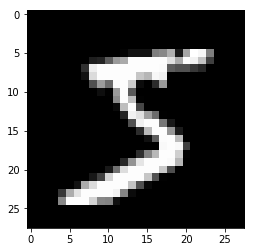

In [0]:
#function call to display image, change the first index to see the other images in dataset. There are 60,000 images in this dataset
image = train_set[0][0]
imshow(image)

# Size of Output Activation Map Fromula 

![alt text](https://miro.medium.com/max/413/0*_r70kZaBlXSyZzz5.)

**function to make sure you are properly layering neural network**


In [0]:
#Define the Convoluted Neural Network

#Note: by default padding = 0, stride = 1

class Net(nn.Module):
  
  def __init__(self):
    super().__init__()

    #Convulation Layer #1                                             # 28 x 28 x 1 (input)
    self.conv1 = nn.Conv2d(1, 20, kernel_size=5)                      # 24 x 24 x 20 (first convolution)
    self.rel1 = nn.ReLU()                                             # activation function

    #Convulation Layer #2
    self.conv2 = nn.Conv2d(20, 40, kernel_size=5)                     # 24 x 24 x 30 (input)
    self.conv2_drop = nn.Dropout(p=0.5)                               # 20 x 20 x 40 (second convultion)
    self.pool = nn.MaxPool2d(2)                                       # 10 x 10 x 40 (pooling)
    self.rel2 = nn.ReLU()                                             # activation function

    #Fully Connecting Layers
    self.lin1 = nn.Linear(4000, 500)                                  # 10 * 10 * 40 = 4000 (input)
    self.lin2 = nn.Linear(500, 10)                                    # 500 ---- > 10 (our handwritten digits 0-9)

  def forward(self, x):

    #Convluation Layer #1
    x = self.conv1(x)
    x = self.rel1(x)
      
    #Convulation Layer #2
    x = self.conv2(x)
    x = self.conv2_drop(x)      
    x = self.pool(x)
    x = self.rel2(x)

    #switch from activation map to vector so that we can pass into linear layers
    x = x.view(-1, 4000)

    #Fully Connecting Layers
    x = self.lin1(x)
    x = F.relu(x)
    x = F.dropout(x, training=True)

    x = self.lin2(x)

    return x


  

In [0]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#create model object
model = Net()
model = model.to(device)

#loss function
criterion = nn.CrossEntropyLoss()

#create optimizer object
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

In [0]:
#Training Function

def train(num_epoch):
  model.train()

  for epoch in range(num_epoch):

    running_loss = 0.0

    for i, data in enumerate(train_loader):
      
      #get the inputs and move tensors to GPU
      images, digits = data
      images = images.to(device)
      digits = digits.to(device)

      #zero the parameter gradients
      optimizer.zero_grad()
      
      #forward pass + backpropagation + optimize
      outputs = model(images)
      loss = criterion(outputs, digits)
      loss.backward()
      optimizer.step()

      #print statistics
      running_loss += loss

      if i % 10 == 9:
        print(f'[Epoch: {epoch+1}, {i+1} / {len(train_loader)}] loss: {running_loss/2000}')

        running_loss = 0.0
  
  print("Finished Training")


    

In [0]:
#train the model through however many epochs. In this case, we use 10 epochs and observe the loss
train(10)

[Epoch: 1, 10 / 50] loss: 0.01044540572911501
[Epoch: 1, 20 / 50] loss: 0.0045465524308383465
[Epoch: 1, 30 / 50] loss: 0.0026129460893571377
[Epoch: 1, 40 / 50] loss: 0.002040607389062643
[Epoch: 1, 50 / 50] loss: 0.0016026862431317568
[Epoch: 2, 10 / 50] loss: 0.0013502842048183084
[Epoch: 2, 20 / 50] loss: 0.0012623484944924712
[Epoch: 2, 30 / 50] loss: 0.0011543974978849292
[Epoch: 2, 40 / 50] loss: 0.0011482633417472243
[Epoch: 2, 50 / 50] loss: 0.0009696446359157562
[Epoch: 3, 10 / 50] loss: 0.0009332102490589023
[Epoch: 3, 20 / 50] loss: 0.0008242821204476058
[Epoch: 3, 30 / 50] loss: 0.0007756857085041702
[Epoch: 3, 40 / 50] loss: 0.0007823125924915075
[Epoch: 3, 50 / 50] loss: 0.0007685055024921894
[Epoch: 4, 10 / 50] loss: 0.0006791244959458709
[Epoch: 4, 20 / 50] loss: 0.0006832994986325502
[Epoch: 4, 30 / 50] loss: 0.00067442178260535
[Epoch: 4, 40 / 50] loss: 0.0005562218721024692
[Epoch: 4, 50 / 50] loss: 0.0005940626724623144
[Epoch: 5, 10 / 50] loss: 0.00054813211318105

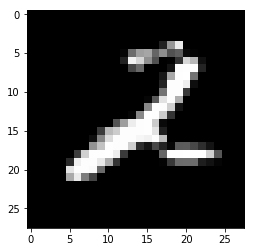

Predicted: tensor(2, device='cuda:0')


In [0]:
#check the model predictions of a random images after the model has been trained 

dataiter = iter(test_loader)
model = model.eval()

images, digits = dataiter.next()
imshow(images[0])
images = images.to(device)
output = model(images)
_, predicted = torch.max(output, 1)

print('Predicted:' , predicted[0])



In [0]:
#function logic to run test loop with the test data
def test():
  model.eval()
  
  correct = 0
  total = 0
  
  with torch.no_grad():
    for data in test_loader:
      images, digits = data
      images = images.to(device)
      digits = digits.to(device)
      outputs = model(images)

      _, predicted = torch.max(outputs.data, 1)
      total += digits.size(0)
      correct += (predicted == digits).sum().item()

  print(f"Accuracy of the model is {100 * correct / total}")



In [0]:
#run function to see accuracy of the model on the unknown test data, be sure to train the model before!

test()

Accuracy of the model is 98.28


In [0]:
#If you want to save the model, simply replace the PATH variable with where you want to download it

#PATH = ""

#torch.save(model, PATH)